# Penarikan Kesimpulan dan Pengujian Hipotesis
Tugas Besar IF2220 Probabilitas dan Statistika 

## Anggota
1. M. Athaullah Daffa Kusuma M (13522044)
2. Christopher Brian (13522106) 

## Enam Langkah Testing:
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.). 
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0. 
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. 
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan. 
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan 

# Header and Loading Dataset to Variable


In [2166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

# database murni
databasenya = pd.read_csv('banana.csv')

# database without number
databasenya1 = databasenya.loc[:, 'Acidity':'Price']

# database numeric only
numeric_columns = databasenya1.select_dtypes(include=[np.number]).columns
databasenumeric = databasenya1.loc[:, numeric_columns]

#database string only
string_columns = databasenya1.select_dtypes(include=['object']).columns
databasestring = databasenya1.loc[:, string_columns]

# 1. Deskripsi Statistika (Descriptive Statistics)

## Penjelasan Atribut
- Count     : Jumlah Data
- Mean      : Rata-rata Data
- Std       : Standar Deviasi, untuk melihat seberapa jauh atau seberapa dekat nilai data dengan rata-ratanya.
- Min       : Nilai Minimal
- Max       : Nilai Maksimal
- 25%       : Kuartil Pertama
- 50%       : Kuartil kedua (Median)
- 75%       : Kuartil ketiga
- Modus     : Nilai yang paling sering muncul
- Variansi  : Seberapa jauh penyebaran data dari nilai rata-ratanya
- Range     : Selisih antara nilai terbesar dan terkecil
- IQR       : Selisih antara kuartil atas dan kuartil bawah
- Skewness  : Kemiringan distribusi data
- Kurtosis  : Derajat kepuncakan 


In [2167]:
data_DesStat = databasenumeric.describe(include=[np.number])
data_DesStat.loc['modus'] = databasenumeric.mode().iloc[0]
data_DesStat.loc['variansi'] = databasenumeric.var()
data_DesStat.loc['range'] = data_DesStat.loc['max'] - data_DesStat.loc['min']
data_DesStat.loc['IQR'] = data_DesStat.loc['75%'] - data_DesStat.loc['25%']
data_DesStat.loc['skewness'] = databasenumeric.skew()
data_DesStat.loc['kurtosis'] = databasenumeric.kurt()
data_DesStat

Acidity       Weight       Length   Appearance       Tannin  \
count     2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean         8.014830   150.011549    49.950434     4.965595     7.965435   
std          1.105781     1.194980     0.894599     1.014863     1.217188   
min          4.456118   146.060922    46.418052     1.775864     4.291274   
25%          7.259942   149.227116    49.346508     4.258210     7.167241   
50%          8.005347   150.022865    49.923682     4.979534     8.022448   
75%          8.758361   150.827613    50.572027     5.653875     8.792184   
max         11.418636   154.070370    53.065151     8.233968    12.416177   
modus        4.456118   146.060922    46.418052     1.775864     4.291274   
variansi     1.222752     1.427977     0.800307     1.029946     1.481546   
range        6.962518     8.009448     6.647099     6.458104     8.124904   
IQR          1.498418     1.600497     1.225519     1.395665     1.624943   
skewness     0.056793    -0.084767     0.026878    -0.035389    -0.066152   
kurtosis    -0.147134     0.024967    -0.053550    -0.002189     0.066349   

             Ripeness    Sweetness     Firmness          Price  
count     2000.000000  2000.000000  2000.000000    2000.000000  
mean         6.743434     6.226319     0.507790   19969.669241  
std          0.680320     0.662980     0.292226     777.347464  
min          4.862560     3.033193     0.000254      -1.000000  
25%          6.268258     5.808028     0.254351   19953.093529  
50%          6.667618     6.312819     0.515483   19999.508312  
75%          7.164813     6.714660     0.758786   20047.301949  
max          9.482066     7.678689     2.000000   20281.431062  
modus        4.862560     3.033193     0.000254       0.000000  
variansi     0.462836     0.439543     0.085396  604269.080280  
range        4.619506     4.645496     1.999746   20282.431062  
IQR          0.896555     0.906632     0.504436      94.208419  
skewness     0.495597    -0.663692     0.024873     -25.469237  
kurtosis     0.278203     0.495115    -0.904900     652.633188

# 2. Outlier Pada Data

Untuk dapat mengetahui apakah terdapat outlier, digunakan metode melihat boxplot.

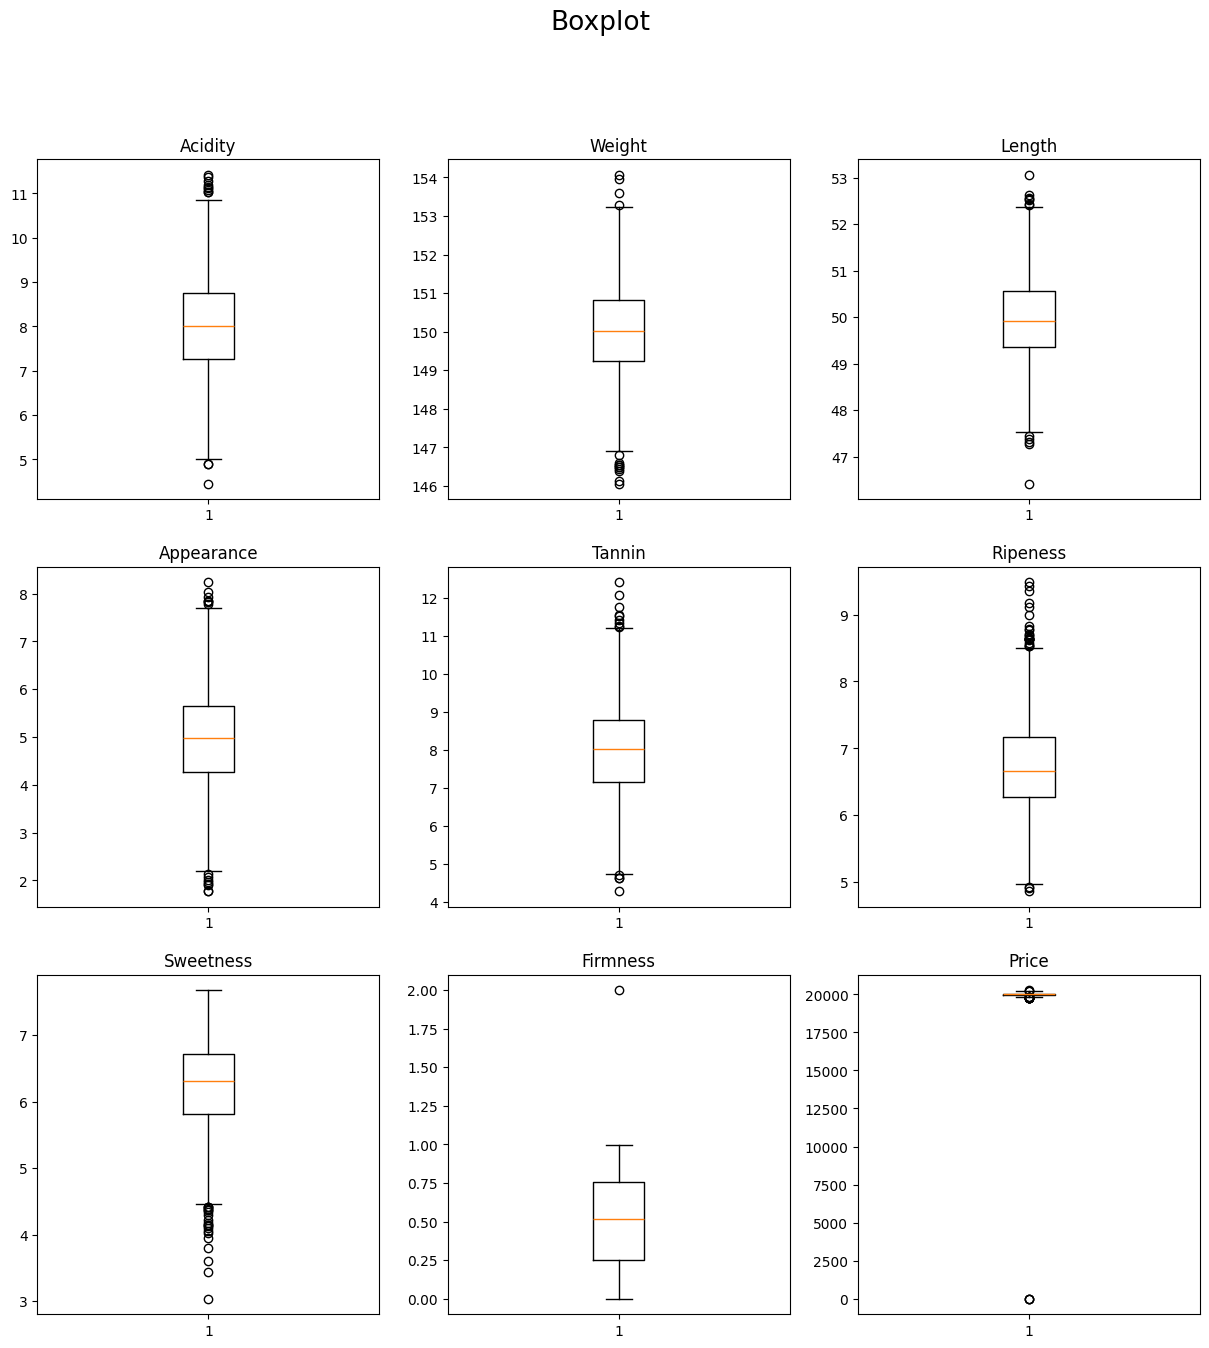

In [2168]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Boxplot', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].boxplot(databasenumeric[databasenumeric.columns[i*3+j]])
        ax[i, j].set_title(databasenumeric.columns[i*3+j])

plt.show()

Berdasarkan boxplot di atas, kolom acidity, weight, length, appearance, tannin, ripeness, dan price memiliki outlier yang melewati batas atas dan batas bawah. Sedangkan kolom sweetness memiliki outlier yang melewati batas bawah dan kolom firmness memiliki outlier yang melewati batas atas.

Untuk menangani outlier ini, salah satu teknik umum untuk menangani outlier ini yaitu pemangkasan. Pemangkasan merupakan penghapusan data outlier tersebut dari dataset tersebut. Selain itu, juga dapat dilakukan Winsorizing pada data tersebut, yaitu mengganti nilai outlier tersebut dengan nilai persentil tertentu dalam rentang tertentu.

Kita akan melakukan winsorizing dimana kita akan mereplace data tersebut menjadi Upper_whisker jika data tersebut di atas Upper_whisker, dan mereplace data tersebut menjadi Lower_whisker jika data tersebut di atas Lower_whisker.

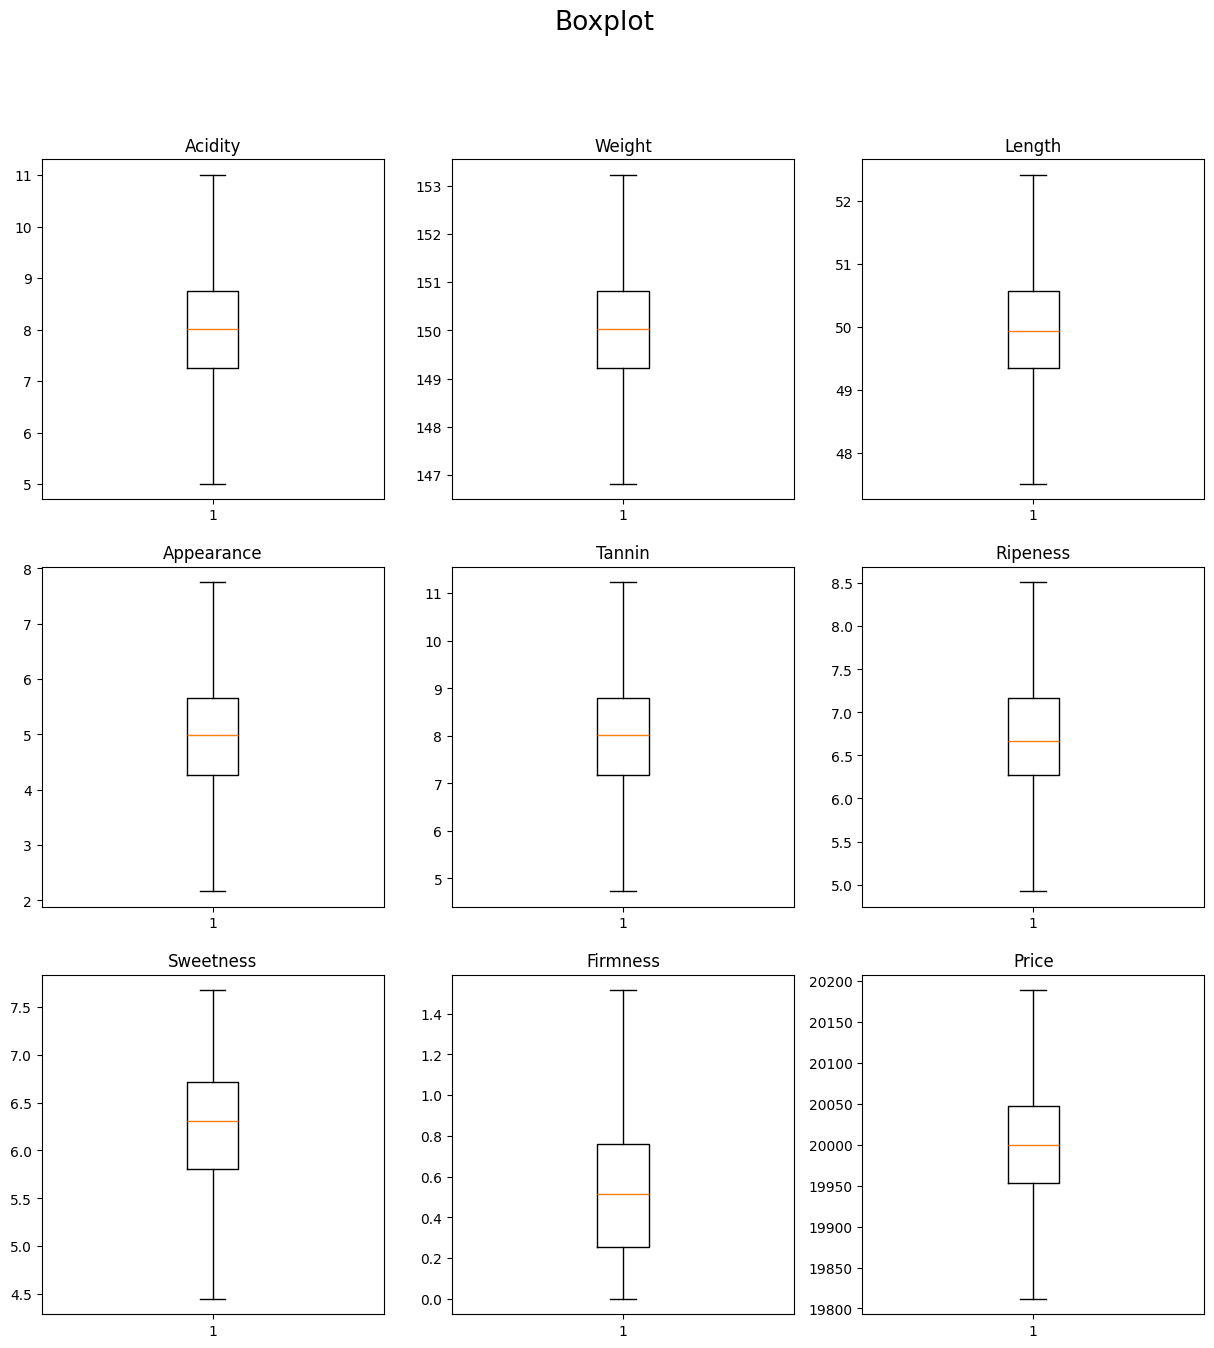

In [2169]:
databaseNonOutlier = pd.DataFrame(databasenumeric)

for i in list(databaseNonOutlier.columns):
    Q1 = databaseNonOutlier[i].quantile(0.25)
    Q3 = databaseNonOutlier[i].quantile(0.75)
    IQR = Q3-Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR
    databaseNonOutlier[i].values[databaseNonOutlier[i].values <= Lower_whisker] = Lower_whisker
    databaseNonOutlier[i].values[databaseNonOutlier[i].values >= Upper_whisker] = Upper_whisker
    
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Boxplot', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].boxplot(databaseNonOutlier[databaseNonOutlier.columns[i*3+j]])
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()


Dilihat dari boxplot yang baru, kita berhasil menghapus data-data outlier dengan melakukan Winsorizing.

# 3. Visualisasi Plot Distribusi

Untuk kolom numerik akan dibuat dalam bentuk boxplot dan histogram. Sementara kolom string dibuat hanya dalam bentuk histogram. 

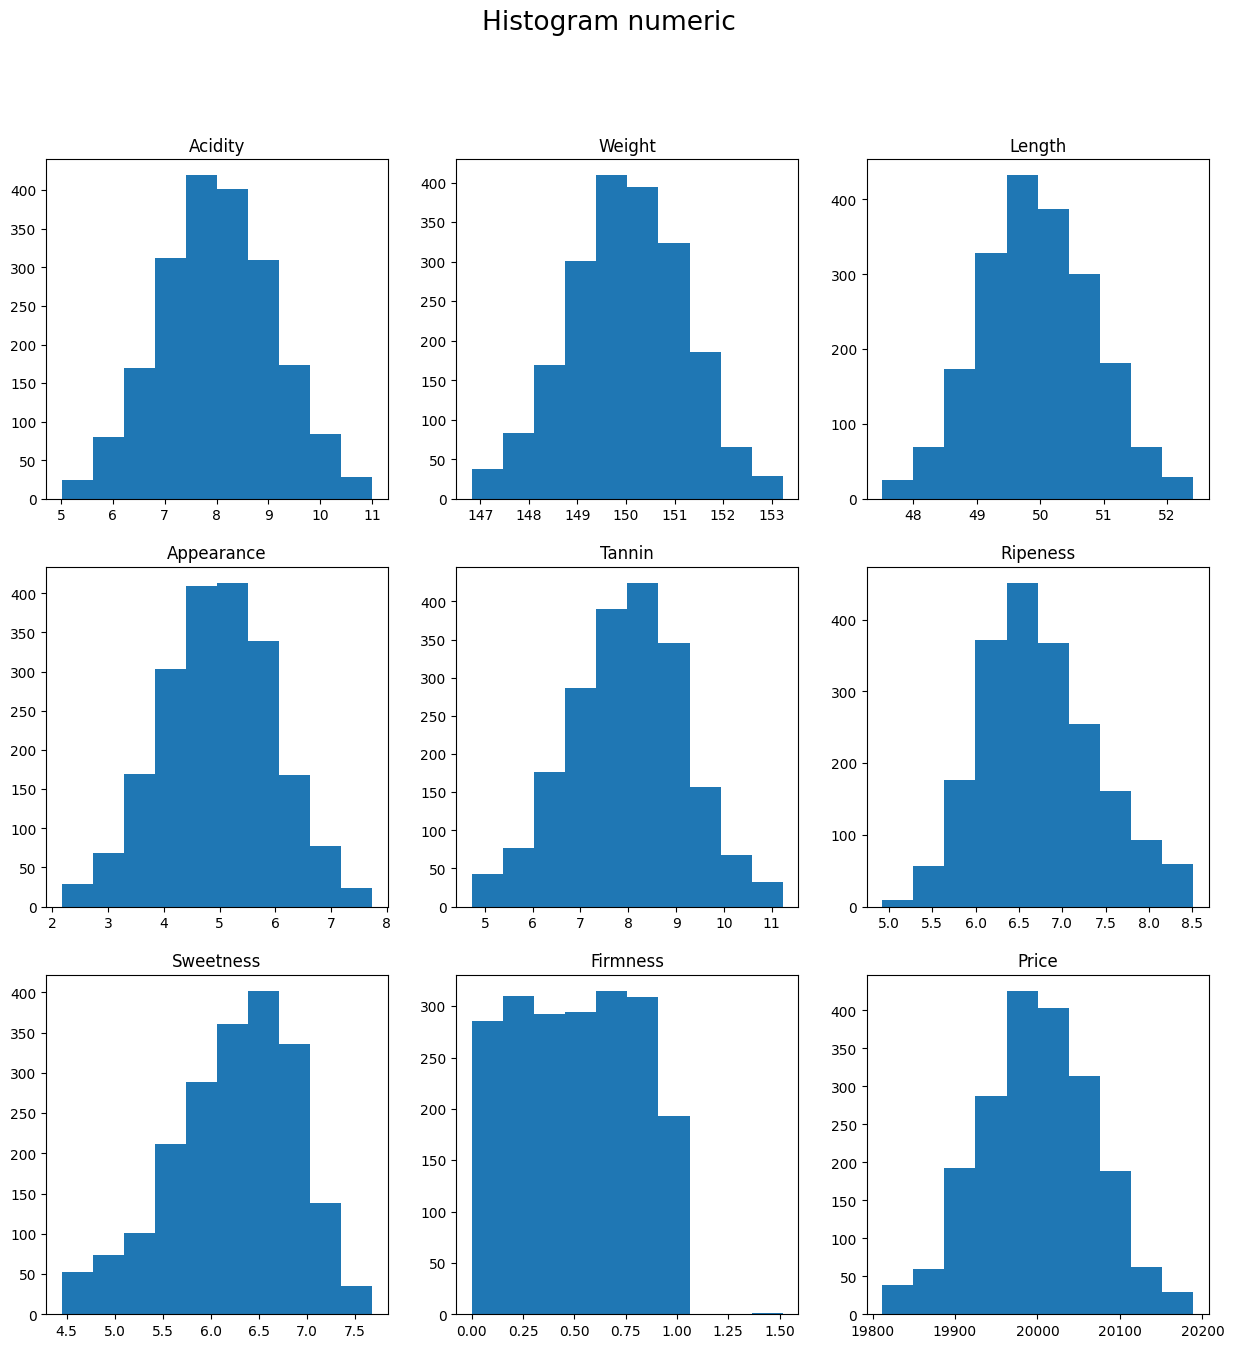

In [2170]:
# Histogram numeric
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Histogram numeric', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].hist(databaseNonOutlier[databaseNonOutlier.columns[i*3+j]])
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()

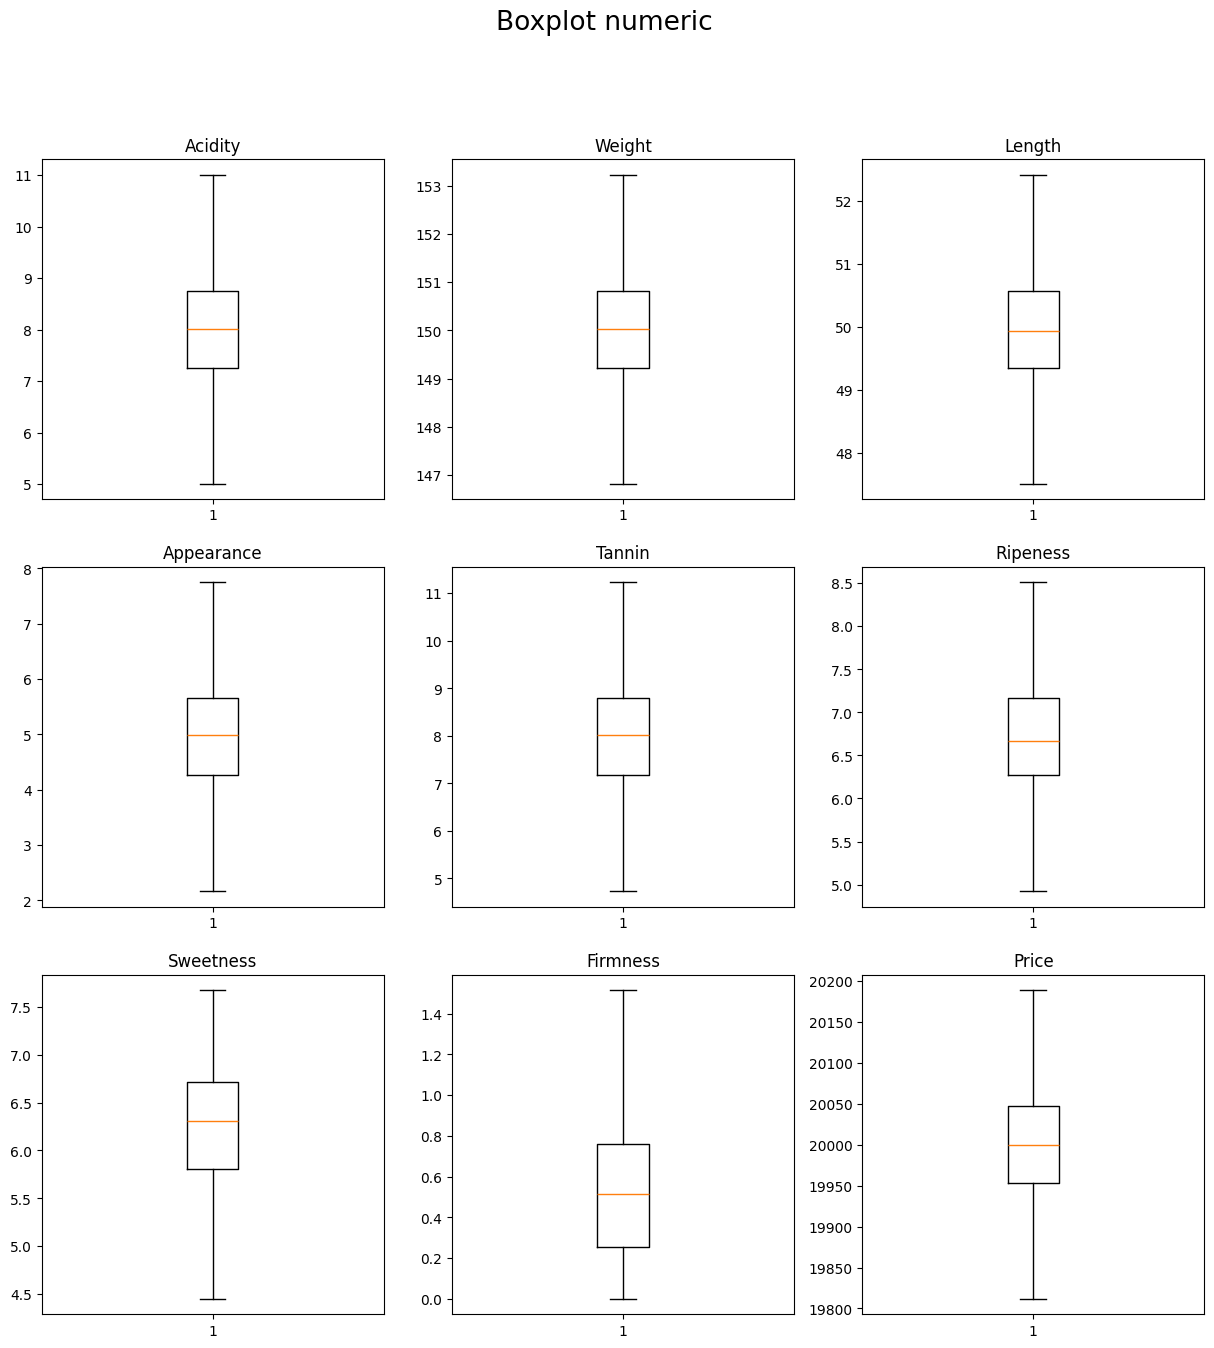

In [2171]:
# Boxplot numeric
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Boxplot numeric', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].boxplot(databaseNonOutlier[databaseNonOutlier.columns[i*3+j]])
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()

#### Penjelasan Kondisi setiap kolom berdasarkan kedua plot diatas : (Data numerik)

Kolom Acidity, Weight, Appearance memiliki data yang relatif lebih tersebar dibanding kolom lainnya, karena panjang whiskers ketiga kolom tersebut relatif lebih panjang dibanding kolom Length, Tannin, Ripeness, Sweetness, Firmness, dan Price.

Berdasarkan histogram (dengan melihat bar tertinggi), modus dari kolom Acidity sekitar 7.8, modus dari kolom Weight sekitar 149.7, modus dari kolom Length sekitar 49.7, modus dari kolom Appearance sekitar 5.2, modus dari kolom Tannin sekitar 8.2, modus dari kolom Ripeness sekitar 6.6, modus dari kolom Sweetness sekitar 6.7, modus dari kolom Firmness sekitar 0.7, dan modus dari kolom Price sekitar 20000.

Berdasarkan boxplot, median dari kolom Acidity sekitar 8, median dari kolom Weight sekitar 150, median dari kolom Length sekitar 50, median dari kolom Appearance sekitar 5, median dari kolom Tannin sekitar 8, median dari kolom Ripeness sekitar 6.6, median dari kolom Sweetness sekitar 6.3, median dari kolom Firmness sekitar 0.5, dan median dari kolom Price sekitar 20000.

Berdasarkan histogram, kolom Acidity, Weight, dan Appearance memiliki skewness yang cukup simetris. Sementara kolom Length, Sweetness, dan Price negatively skewed, dan kolom Tannin, Ripeness, dan Firmness positively skewed.

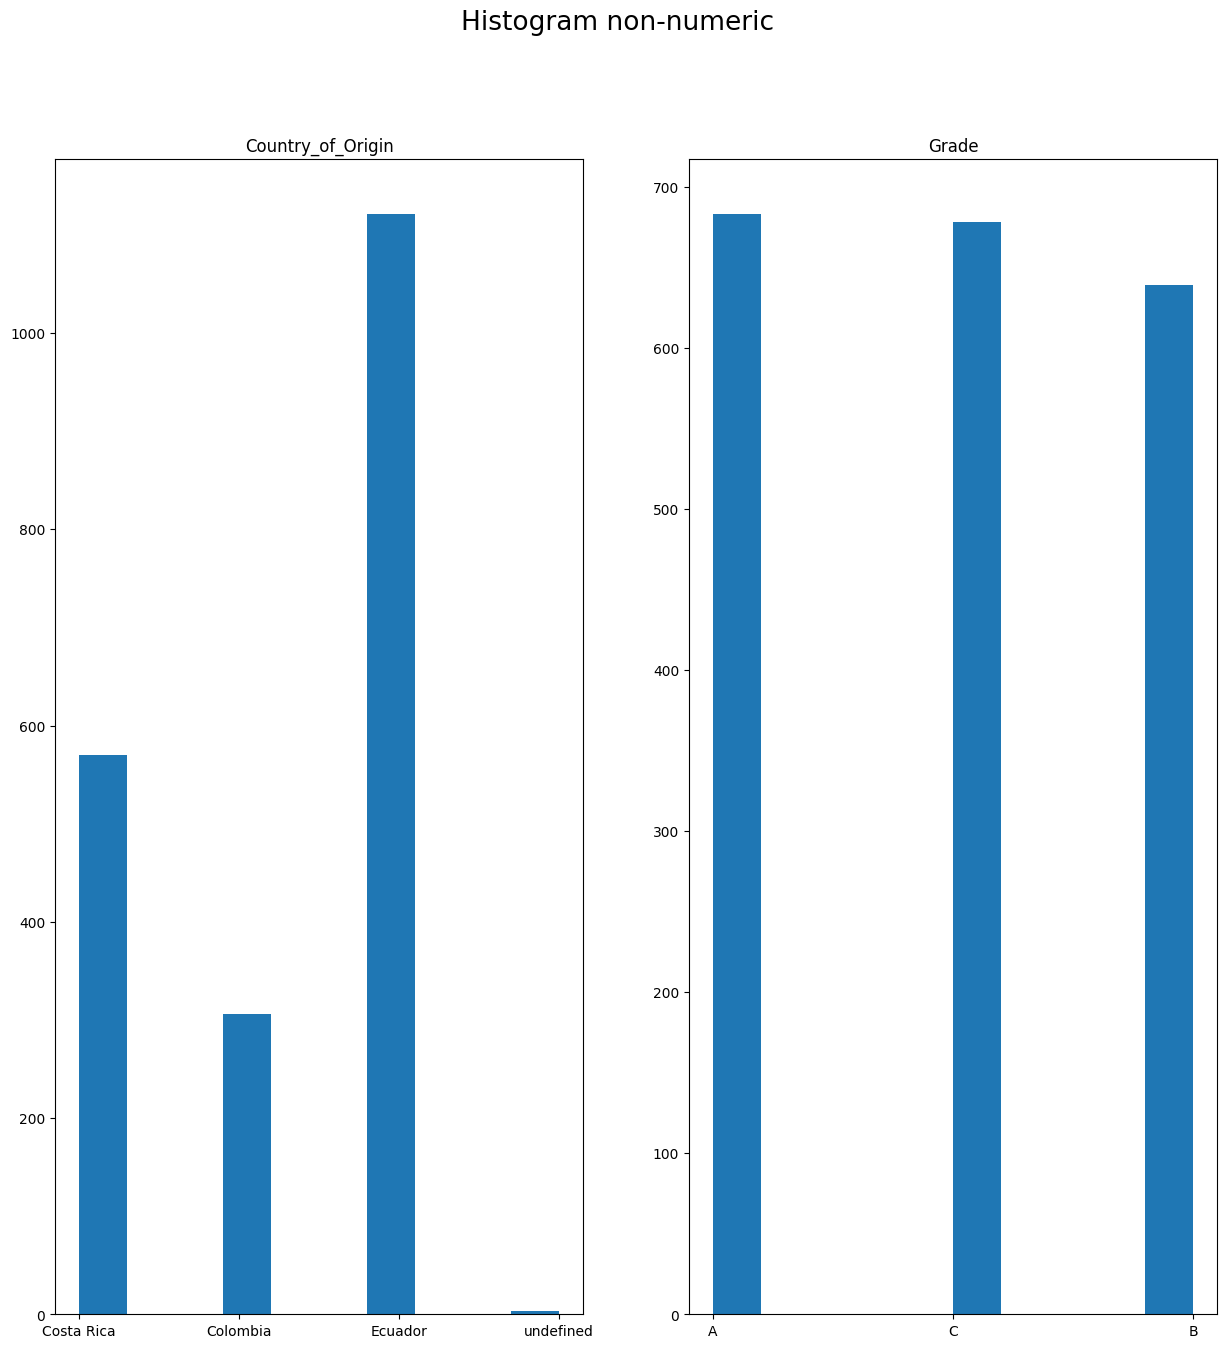

In [2172]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
fig.suptitle('Histogram non-numeric', fontsize=19)
for j in range(2):
    ax[j].hist(databasestring[databasestring.columns[j]])
    ax[j].set_title(databasestring.columns[j])

plt.show()

#### Penjelasan Kondisi setiap kolom berdasarkan plot diatas : (Data String)

Berdasarkan bar tertinggi pada histogram di atas, kolom Country_of_Origin memiliki modus "Ecuador", dan kolom Grade memiliki modus "A". Selain itu, kolom Country_of_Origin negatively skewed dan kolom Grade positively skewed.

# 4. Normality Test

Untuk menentukan apakah sebuah kolom numerik tersebut terdistribusi secara normal, kita gunakan metode Normality Test.

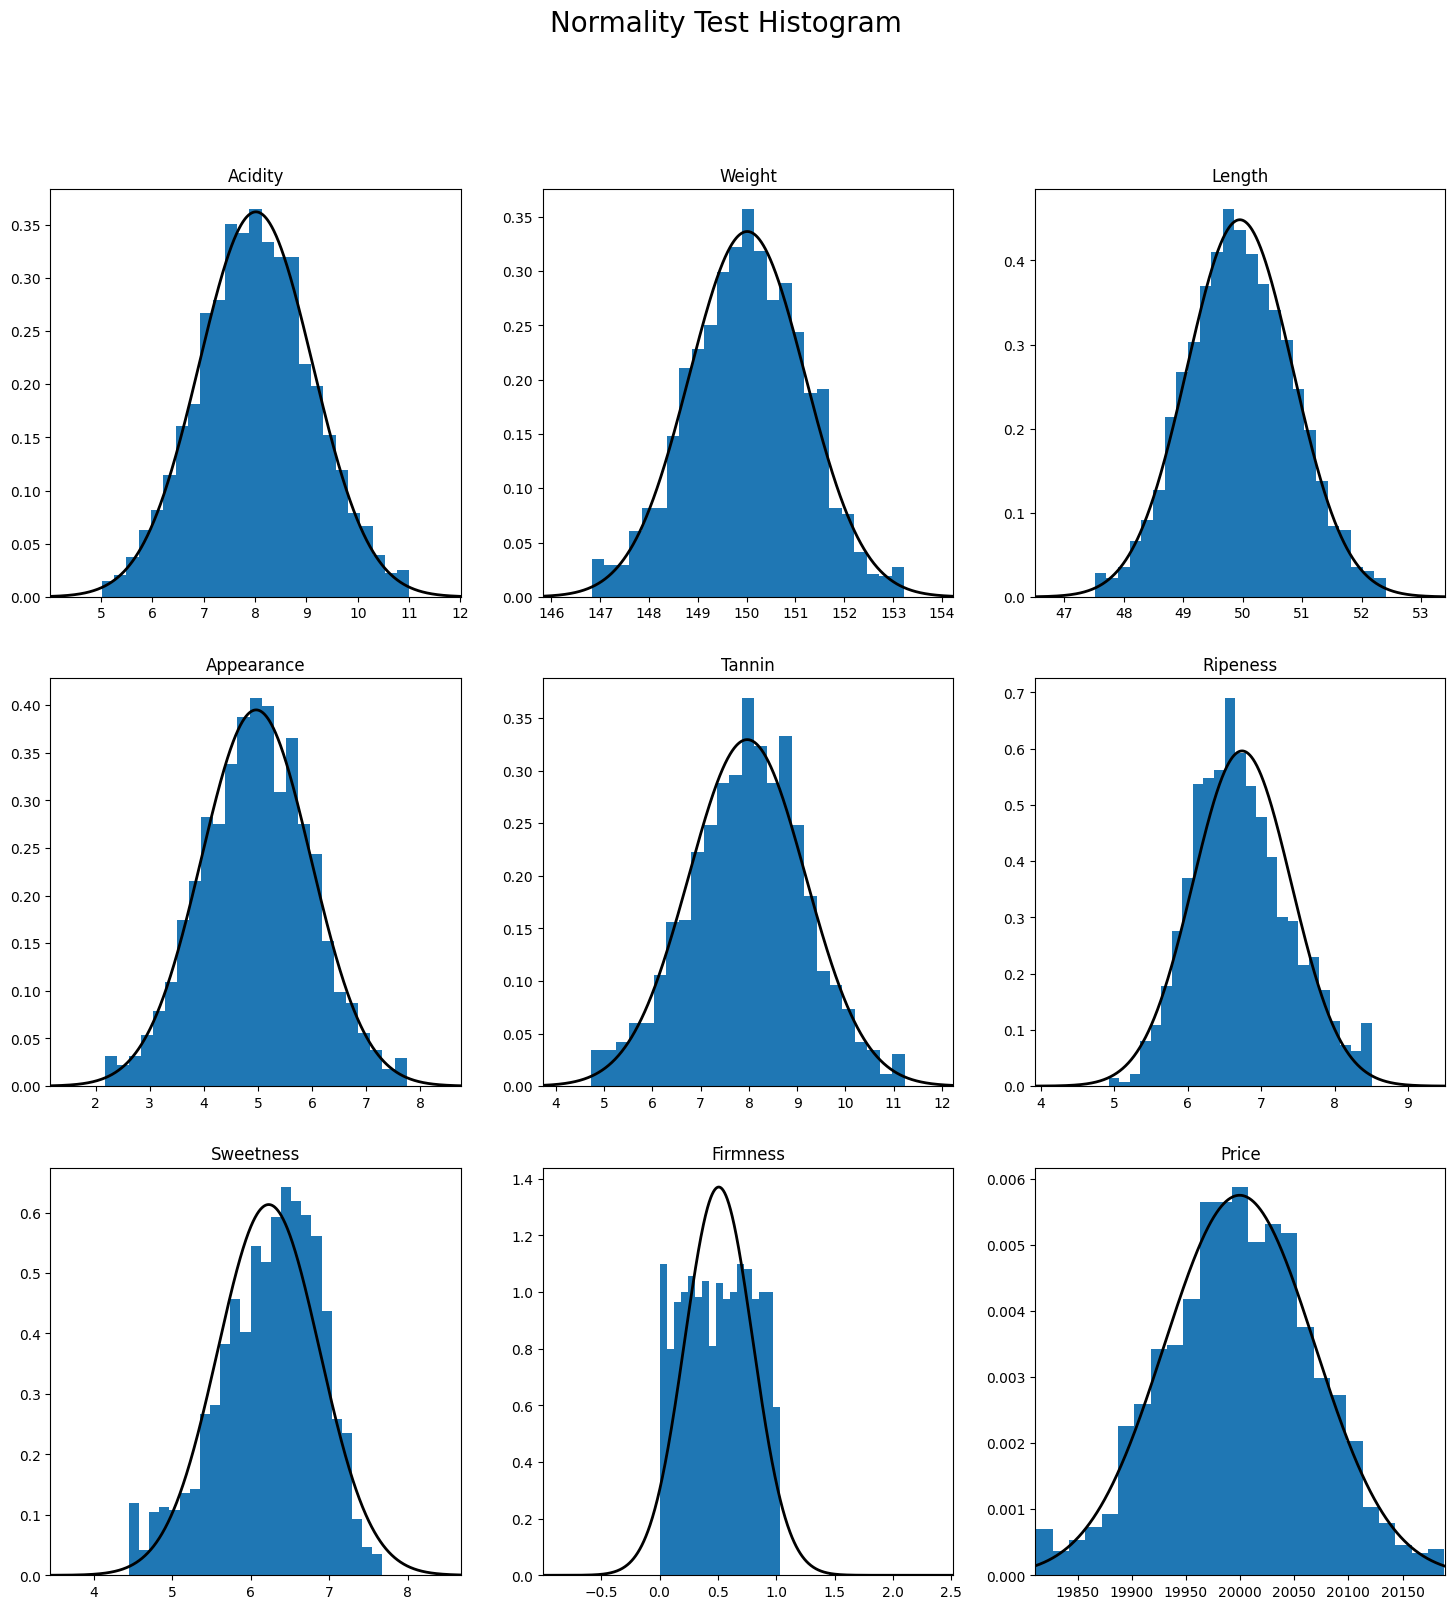

In [2173]:
fig, ax = plt.subplots(3,3,figsize=(18,18))
fig.suptitle('Normality Test Histogram', fontsize=20)

for i in range(3):
    for j in range(3):
        
        dataNorm = databaseNonOutlier[databaseNonOutlier.columns[i*3+j]]
        a, std = scipy.stats.norm.fit(dataNorm)
        
        minval = np.min(dataNorm)-1
        maxval = np.max(dataNorm)+1

        ax[i, j].hist(dataNorm, bins=25, density=True)

        ax[i, j].set_xlim(minval, maxval)

        x = np.linspace(minval, maxval, 1000)
        pl = scipy.stats.norm.pdf(x, a, std)
        ax[i, j].plot(x, pl, 'k', linewidth=2)
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()

Berdasarkan data di atas, kolom Acidity, Weight, Length, Appearance, dan Price terdistribusi secara normal (dilihat dari bentuk Bell's Curve). Sedangkan kolom Tannin yang positively skewed, Ripeness yang negatively skewed, Sweetness yang negatively skewed, dan Firmness yang positively skewed tidak terdistribusi secara normal.

# 5. Hipotesis 1 sampel

Untuk menjawab beberapa hipotesis, pertama-tama akan dilakukan analisis menggunakan satu sampel.

#### a. Rata-rata nilai Acidity di atas 6

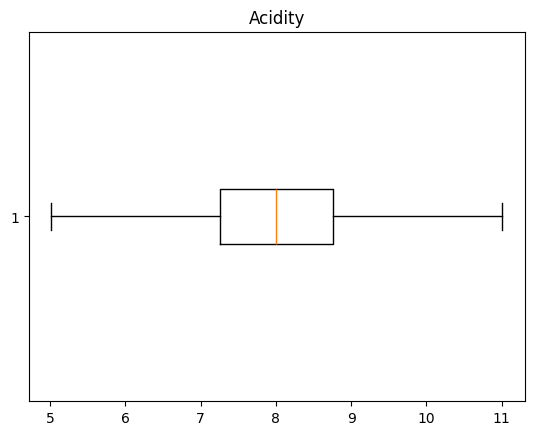

Rata-rata: 8.014421721521236
Standar deviasi: 1.1020830220154576


In [2174]:
plt.boxplot(databaseNonOutlier['Acidity'], vert = False)
plt.title('Acidity')
plt.show()
mean_acidity = np.mean(databaseNonOutlier['Acidity'])
std_acidity = np.std(databaseNonOutlier['Acidity'])
print(f"Rata-rata: {mean_acidity}")
print(f"Standar deviasi: {std_acidity}")

#### Langkah Testing:
1. $H_0$ : $\mu = 6$ 
2. $H_1$ : $\mu > 6$
3. $\alpha = 0.05$

In [2175]:
n_acidity = databaseNonOutlier.shape[0]
z0_acidity = scipy.stats.norm.ppf(0.05) * (-1)
print(f"Critical Region: z > {z0_acidity}")
mu0_acidity = 6
print("Penghitungan menggunakan fungsi library:")
zscore_acidity_library, p_acidity_library = ztest(databaseNonOutlier['Acidity'], value = mu0_acidity, alternative = 'larger')
print(f"z = {zscore_acidity_library}")
print(f"P (z > {zscore_acidity_library}) = {p_acidity_library}")
print("Penghitungan manual:")
zscore_acidity_manual = (mean_acidity - mu0_acidity) / (std_acidity/np.sqrt(n_acidity))
print(f"z = {zscore_acidity_manual}")
p_acidity_manual = 1 - scipy.stats.norm.cdf(zscore_acidity_manual)
print(f"P (z > {zscore_acidity_manual}) = {p_acidity_manual}")

Critical Region: z > 1.6448536269514729
Penghitungan menggunakan fungsi library:
z = 81.72265751204188
P (z > 81.72265751204188) = 0.0
Penghitungan manual:
z = 81.74309584111273
P (z > 81.74309584111273) = 0.0


4. Untuk uji mean one-tailed dengan standar deviasi populasi diketahui, critical region ada di $z > 1.645$
5. Penghitungan menggunakan fungsi library:
$$z = 81.72265751204188 \; (z > 1.645) $$
$$ P(z > 81.81.72265751204188) = 0.0 < 0.05$$
Penghitungan manual: 
$$z = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}   $$
$$z = \frac{8.014421721521236 - 6}{1.1020830220154576/\sqrt{2000}} = 81.74309584111273 \; (z > 1.645)  $$
$$ P = P(z > 81.74309584111273) = 1 - P(z < 81.74309584111273) = 0 < 0.05$$
6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, z score berada di dalam daerah kritis dan p value lebih kecil dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ dapat ditolak. Kesimpulannya, nilai rata-rata Acidity di atas 6.

#### b. Rata-rata berat tidak sama dengan 150 gram

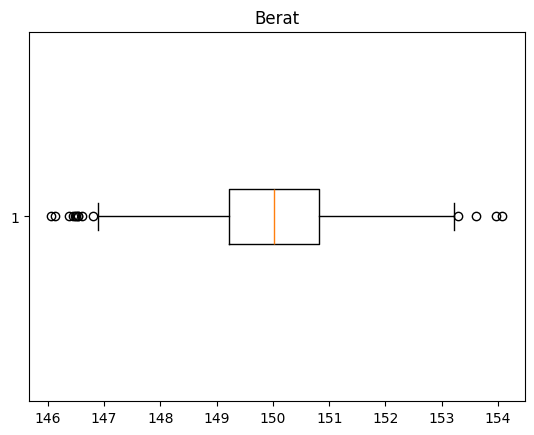

Rata-rata: 150.01154884061205
Standar deviasi: 1.194681336922938


In [2176]:
plt.boxplot(databasenya['Weight'], vert = False)
plt.title('Berat')
plt.show()
mean_weight = np.mean(databasenya['Weight'])
std_weight = np.std(databasenya['Weight'])
print(f"Rata-rata: {mean_weight}")
print(f"Standar deviasi: {std_weight}")

#### Langkah Testing:
1. $H_0$ : $\mu = 150$ 
2. $H_1$ : $\mu \neq 150$
3. $\alpha = 0.05$

In [2177]:
n_weight = databaseNonOutlier.shape[0]
z0_weight = scipy.stats.norm.ppf(0.05 / 2) * (-1)
print(f"Critical Region: z < {-z0_weight} dan z > {z0_weight}")
mu0_weight = 150
print("Penghitungan menggunakan fungsi library:")
zscore_weight_library, p_weight_library = ztest(databaseNonOutlier['Weight'], value = mu0_weight, alternative = 'two-sided')
print(f"z = {zscore_weight_library}")
print(f"P (z < {-zscore_weight_library}) + P (z > {zscore_weight_library}) = {p_weight_library}")
print("Penghitungan manual:")
zscore_weight_manual = (mean_weight - mu0_weight) / (std_weight/np.sqrt(n_weight))
print(f"z = {zscore_weight_manual}")
p_weight_manual = 1 - scipy.stats.norm.cdf(zscore_weight_manual)
print(f"P (z < {-zscore_weight_manual}) + P (z > {zscore_weight_manual}) = {2 * p_weight_manual}")

Critical Region: z < -1.9599639845400545 dan z > 1.9599639845400545
Penghitungan menggunakan fungsi library:
z = 0.4686734215241999
P (z < -0.4686734215241999) + P (z > 0.4686734215241999) = 0.6393030876682891
Penghitungan manual:
z = 0.43231599710711827
P (z < -0.43231599710711827) + P (z > 0.43231599710711827) = 0.6655117620129833


4. Untuk uji mean two-tailed dengan standar deviasi populasi diketahui, critical region ada di $z < -1.960$ dan $z > 1.960$
5. Penghitungan menggunakan fungsi library:
$$z = 0.4686734215241999 \; (-1.960 < z < 1.960) $$
$$ P(z < -0.4686734215241999) + P(z > 0.4686734215241999) = 0.6393030876682891 > 0.05$$
Penghitungan manual: 
$$z = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}   $$
$$z = \frac{150.01154884061205 - 150}{1.194681336922938/\sqrt{2000}} = 0.43231599710711827 \; (-1.960 < z < 1.960) $$
$$ P = P(z < -0.43231599710711827) + P(z > 0.43231599710711827) = 2(1 - P(t < 0.43231599710711827)) = 0.6655117620129833 > 0.05$$
6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, z score berada di luar daerah kritis dan p value lebih besar dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ tidak dapat ditolak. Kesimpulannya, nilai rata-rata berat sama dengan 150.

#### c. Rata-rata panjang buah pisang 10 baris terakhir tidak sama dengan 49

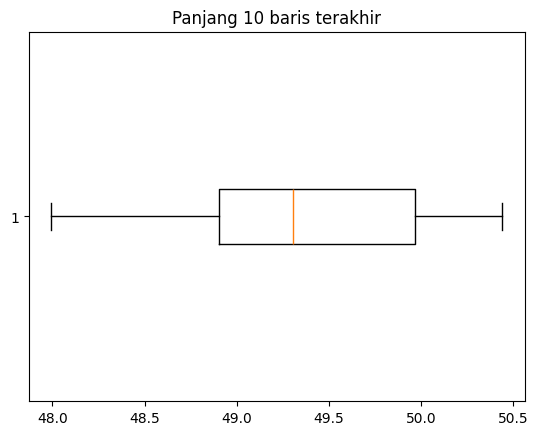

Rata-rata: 49.32726280603568
Standar deviasi: 0.7632913606944299


In [2178]:
plt.boxplot(databaseNonOutlier['Length'].tail(10), vert = False)
plt.title('Panjang 10 baris terakhir')
plt.show()
mean_length = np.mean(databaseNonOutlier['Length'].tail(10))
std_length = np.std(databaseNonOutlier['Length'].tail(10))
print(f"Rata-rata: {mean_length}")
print(f"Standar deviasi: {std_length}")

#### Langkah Testing:
1. $H_0$ : $\mu = 49$ 
2. $H_1$ : $\mu \neq 49$
3. $\alpha = 0.05$

In [2179]:
n_length = 10
z0_length = scipy.stats.norm.ppf(0.05 / 2) * (-1)
print(f"Critical Region: z < {-z0_length} dan z > {z0_length}")
mu0_length = 49
print("Penghitungan menggunakan fungsi library:")
zscore_length_library, p_length_library = ztest(databaseNonOutlier['Length'].tail(n_length), value = mu0_length, alternative = 'two-sided')
print(f"z = {zscore_length_library}")
print(f"P (z < {-zscore_length_library}) + P (z > {zscore_length_library}) = {p_length_library}")
print("Penghitungan manual:")
zscore_length_manual = (mean_length - mu0_length) / (std_length/np.sqrt(n_length))
print(f"z = {zscore_length_manual}")

p_length_manual = 1 - scipy.stats.norm.cdf(zscore_length_manual)
print(f"P (z < {-zscore_length_manual}) + P (z > {zscore_length_manual}) = {2 * p_length_manual}")

Critical Region: z < -1.9599639845400545 dan z > 1.9599639845400545
Penghitungan menggunakan fungsi library:
z = 1.2862564266596896
P (z < -1.2862564266596896) + P (z > 1.2862564266596896) = 0.1983535840665276
Penghitungan manual:
z = 1.355833321091315
P (z < -1.355833321091315) + P (z > 1.355833321091315) = 0.17515220680816945


4. Untuk uji mean two-tailed dengan standar deviasi populasi diketahui, critical region ada di $z < -1.960$ dan $z > 1.960$
5. Penghitungan menggunakan fungsi library:
$$z = 1.2862564266596896 \; (-1.960 < z < 1.960) $$
$$ P (z < -1.2862564266596896) + P (z > 1.2862564266596896) = 0.1983535840665276 > 0.05$$
Penghitungan manual:
$$z = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}   $$
$$z = \frac{49.32726280603568 - 49}{0.7632913606944299/\sqrt{49}} = 1.355833321091315 \; (-1.960 < z < 1.960)$$
$$ P = P (t < -1.355833321091315) + P(t > 1.355833321091315) = 2(1 - P(t < 1.355833321091315)) = 0.17515220680816945 > 0.05$$
6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, z score berada di luar daerah kritis dan p value lebih besar dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ tidak dapat ditolak. Kesimpulannya, nilai rata-rata panjang buah pisang 10 baris terakhir sama dengan 49.

#### d. Proporsi nilai Tannin yang lebih besar dari 8 tidak sama dengan 55% dari total dataset

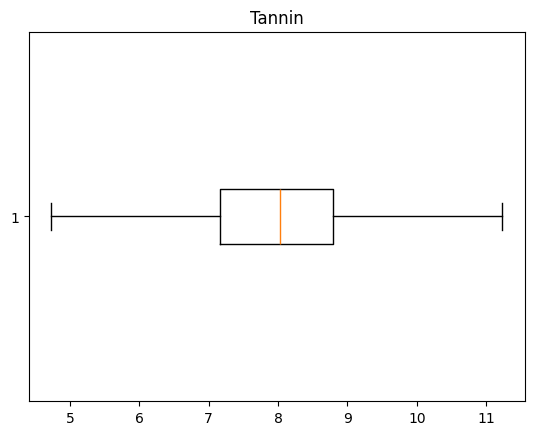

Jumlah tannin > 8: 1013


In [2180]:
plt.boxplot(databaseNonOutlier['Tannin'], vert = False)
plt.title('Tannin')
plt.show()
amount_tannin = (databaseNonOutlier['Tannin'] > 8).sum()
print(f"Jumlah tannin > 8: {amount_tannin}")

#### Langkah Testing
1. $H_0$ : $p = 0.55$ 
2. $H_1$ : $p \neq 0.55$
3. $\alpha = 0.05$

In [2181]:
n_tannin = databaseNonOutlier.shape[0]
z0_tannin = scipy.stats.norm.ppf(0.05 / 2) * (-1)
print(f"Critical Region: z < {-z0_tannin} dan z > {z0_tannin}")
phat_tannin = amount_tannin / n_tannin
print(f"phat: {phat_tannin}")
print("Penghitungan menggunakan fungsi library")
zscore_tannin_library, p_tannin_library = proportions_ztest(amount_tannin, n_tannin, value = 0.55, alternative = 'two-sided')
print(f"z = {zscore_tannin_library}")
print(f"P (z < {zscore_tannin_library}) + P (z > {-zscore_tannin_library}) = {p_tannin_library}")
print("Penghitungan manual:")
zscore_tannin_manual = (phat_tannin - 0.55) / (np.sqrt(0.55 * (1 - 0.55) / n_tannin))
print(f"Z = {zscore_tannin_manual}")

p_tannin_manual = 1 - scipy.stats.norm.cdf(-zscore_tannin_manual)
print(f"P (z < {zscore_tannin_manual}) + P (z > {-zscore_tannin_manual}) = {2 * p_tannin_manual}")

Critical Region: z < -1.9599639845400545 dan z > 1.9599639845400545
phat: 0.5065
Penghitungan menggunakan fungsi library
z = -3.891087091601724
P (z < -3.891087091601724) + P (z > 3.891087091601724) = 9.97961019109872e-05
Penghitungan manual:
Z = -3.9103592022868128
P (z < -3.9103592022868128) + P (z > 3.9103592022868128) = 9.215896806336055e-05


4. Untuk uji proporsi two-tailed dengan aproksimasi normal untuk binomial, critical region ada di $z < -1.960$ atau $z > 1.960$ dengan $\hat{p} = 1013/2000 = 0.5065$ 
5. Penghitungan menggunakan fungsi library:
$$z = -3.891087091601724 \; (z < -1.960) $$
$$ P(z < -3.891087091601724) + P(z > 3.891087091601724) = 9.97961019109872 \times 10^{-5} < 0.025$$
Penghitungan manual:
$$z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}   $$
$$z = \frac{0.5065 - 0.55}{\sqrt{\frac{0.55(0.45)}{2000}}} = -3.9103592022868128  $$
$$ P = P(z < -3.9103592022868128) + P(z > 3.9103592022868128) = 2(1 - P(z < 3.9103592022868128)) = 9.215896806336055 \times 10^{-5} < 0.025$$
6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, z score berada di dalam daerah kritis dan p value lebih kecil dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ dapat ditolak. Kesimpulannya, proporsi nilai tannin yang lebih besar dari 8 tidak sama dengan 55%.

# 6. Hipotesis 2 sampel

Untuk menjawab beberapa hipotesis, selanjutnya akan dilakukan analisis menggunakan dua sampel.

#### a. Rata-rata acidity bagian awal dan bagian akhir bernilai sama

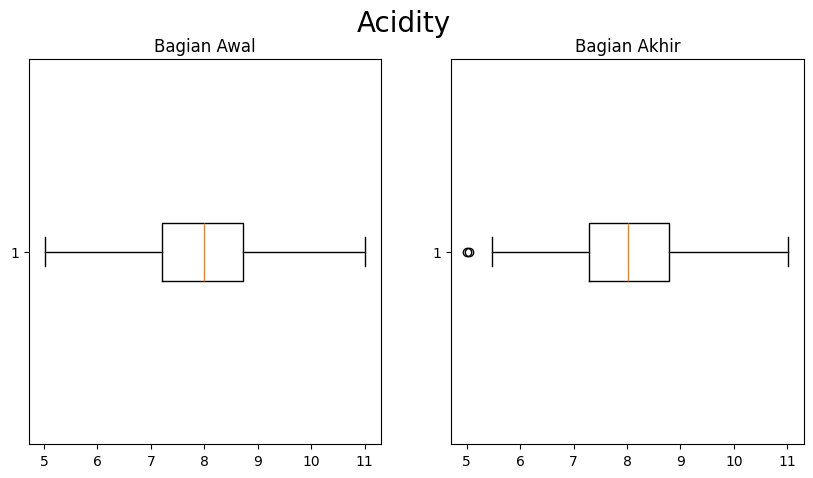

In [2182]:
lower_half_acidity = databaseNonOutlier['Acidity'][:1000]
upper_half_acidity = databaseNonOutlier['Acidity'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Acidity', fontsize=20)
ax[0].boxplot(lower_half_acidity, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half_acidity, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

In [2183]:
print(f"Rata-rata 1: {np.mean(lower_half_acidity)}")
print(f"Standar deviasi 1: {np.std(lower_half_acidity)}")
print(f"Rata-rata 2: {np.mean(upper_half_acidity)}")
print(f"Standar deviasi 2: {np.std(upper_half_acidity)}")

Rata-rata 1: 7.983382703754833
Standar deviasi 1: 1.1131390721240715
Rata-rata 2: 8.04546073928764
Standar deviasi 2: 1.090031439772451


#### Langkah Testing
1. $H_0$ : $\mu_1 - \mu_2 = 0$ 
2. $H_1$ : $\mu_1 - \mu_2 \neq 0$
3. $\alpha = 0.05$

In [2184]:
n_acidity = databaseNonOutlier.shape[0] / 2
z0_acidity = scipy.stats.norm.ppf(0.05 / 2) * (-1)
print(f"Critical Region: z < {-z0_acidity} dan z > {z0_acidity}")
print("Penghitungan menggunakan fungsi library:")
zscore_acidity_library, p_acidity_library = ztest(lower_half_acidity, upper_half_acidity, value = 0, alternative = 'two-sided')
print(f"z = {zscore_acidity_library}")
print(f"P (z < {zscore_acidity_library}) + P (z > {-zscore_acidity_library}) = {p_acidity_library}")
print("Penghitungan manual:")
zscore_acidity_manual = (np.mean(lower_half_acidity) - np.mean(upper_half_acidity)) / ( np.sqrt((np.std(lower_half_acidity) ** 2 / n_acidity)+(np.std(upper_half_acidity) ** 2 / n_acidity)))
print(f"z = {zscore_acidity_manual}")

p_acidity_manual = 1 - scipy.stats.norm.cdf(-zscore_acidity_manual)
print(f"P (z < {zscore_acidity_manual}) + P (z > {-zscore_acidity_manual}) = {2 * p_acidity_manual}")

Critical Region: z < -1.9599639845400545 dan z > 1.9599639845400545
Penghitungan menggunakan fungsi library:
z = -1.2594000634143625
P (z < -1.2594000634143625) + P (z > 1.2594000634143625) = 0.20788586656891994
Penghitungan manual:
z = -1.2600302361150006
P (z < -1.2600302361150006) + P (z > 1.2600302361150006) = 0.20765845500390467


4. Untuk uji mean two-tailed dengan standar deviasi populasi diketahui, critical region ada di $z < -1.960$ atau $z > 1.960$
5. Penghitungan menggunakan fungsi library:
$$z = -1.2594000634143625 \; (-1.960 < z < 1.960) $$
$$ P (z < -1.2594000634143625) + P (z > 1.2594000634143625) = 0.20788586656891994 > 0.05$$
Penghitungan manual:
$$z = \frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\frac{σ_1^2}{n_1}+\frac{σ_2^2}{n_2}}}   $$
$$z = \frac{(7.983382703754833 - 8.04546073928764) - 0}{\sqrt{\frac{1.1131390721240715^2}{1000}+\frac{1.090031439772451^2}{1000}}} = -1.2600302361150006   $$
$$ P = P(z < -1.2600302361150006) + P(z > 1.2600302361150006) = 2(1 - P(z > 1.2600302361150006)) = 0.20765845500390467 > 0.05$$ 
6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, z score berada di luar daerah kritis dan p value lebih besar dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ tidak dapat ditolak. Kesimpulannya, nilai rata-rata acidity bagian awal dan bagian akhir bernilai sama.

#### b. Rata-rata appearance bagian awal lebih besar dari bagian akhir sebesar 0.1

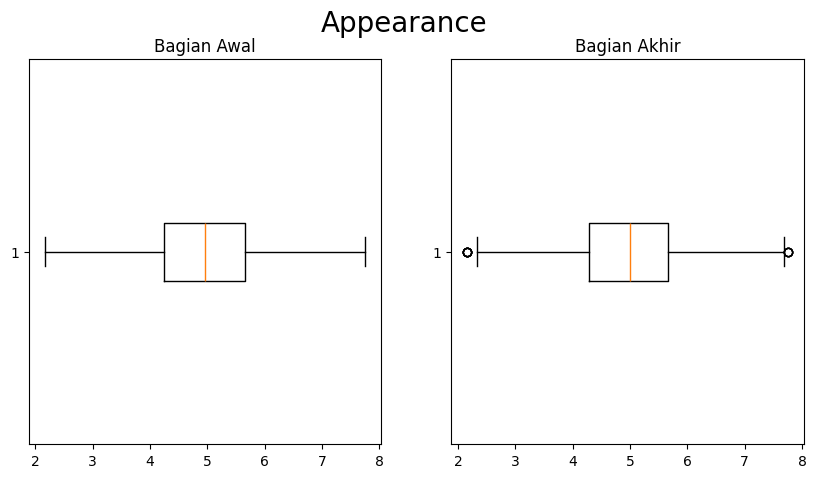

In [2185]:
lower_half_appearance = databaseNonOutlier['Appearance'][:1000]
upper_half_appearance = databaseNonOutlier['Appearance'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Appearance', fontsize=20)
ax[0].boxplot(lower_half_appearance, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half_appearance, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

In [2186]:
print(f"Rata-rata 1: {np.mean(lower_half_appearance)}")
print(f"Standar deviasi 1: {np.std(lower_half_appearance)}")
print(f"Rata-rata 2: {np.mean(upper_half_appearance)}")
print(f"Standar deviasi 2: {np.std(upper_half_appearance)}")

Rata-rata 1: 4.96394082501973
Standar deviasi 1: 1.0118469830118377
Rata-rata 2: 4.967733555971008
Standar deviasi 2: 1.008736935351487


#### Langkah Testing
1. $H_0$ : $\mu_1 - \mu_2 = 0.1$ 
2. $H_1$ : $\mu_1 - \mu_2 \neq 0.1$
3. $\alpha = 0.05$

In [2187]:
n_appearance = databaseNonOutlier.shape[0] / 2
z0_appearance = scipy.stats.norm.ppf(0.05 / 2) * (-1)
print(f"Critical Region: z < {-z0_appearance} dan z > {z0_appearance}")
print("Penghitungan menggunakan fungsi library:")
zscore_appearance_library, p_appearance_library = ztest(lower_half_appearance, upper_half_appearance, value = 0.1, alternative = 'two-sided')
print(f"z = {zscore_appearance_library}")
print(f"P (z < {zscore_appearance_library}) + P (z > {-zscore_appearance_library}) = {p_appearance_library}")
print("Penghitungan manual:")
zscore_appearance_manual = (np.mean(lower_half_appearance) - np.mean(upper_half_appearance) - 0.1) / ( np.sqrt((np.std(lower_half_appearance) ** 2 / n_appearance)+(np.std(upper_half_appearance) ** 2 / n_appearance)))
print(f"z = {zscore_appearance_manual}")

p_appearance_manual = 1 - scipy.stats.norm.cdf(-zscore_appearance_manual)
print(f"P (z < {zscore_appearance_manual}) + P (z > {-zscore_appearance_manual}) = {2 * p_appearance_manual}")

Critical Region: z < -1.9599639845400545 dan z > 1.9599639845400545
Penghitungan menggunakan fungsi library:
z = -2.296081367997967
P (z < -2.296081367997967) + P (z > 2.296081367997967) = 0.02167122941291596
Penghitungan manual:
z = -2.297230270430632
P (z < -2.297230270430632) + P (z > 2.297230270430632) = 0.02160563718147812


4. Untuk uji mean two-tailed dengan standar deviasi populasi diketahui, critical region ada di $z < -1.960$ atau $z > 1.960$
5. Penghitungan menggunakan fungsi library:
$$z = -2.296081367997967 \; (z < -1.960) $$
$$ P (z < -2.296081367997967) + P (z > 2.296081367997967) = 0.02167122941291596 < 0.05$$
Penghitungan manual:
$$z = \frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\frac{σ_1^2}{n_1}+\frac{σ_2^2}{n_2}}}   $$
$$z = \frac{(4.96394082501973 - 4.967733555971008) - 0.1}{\sqrt{\frac{1.0118469830118377^2}{1000}+\frac{1.008736935351487^2}{1000}}} = -2.297230270430632   $$
$$ P = P(z < -2.297230270430632) + P(z > 2.297230270430632) = 2(1 - P(z > 2.297230270430632)) = 0.02160563718147812 < 0.05$$ 
6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, z score berada di dalam daerah kritis dan p value lebih kecil dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ dapat ditolak. Kesimpulannya, nilai rata-rata appearance bagian awal tidak bernilai lebih besar dari bagian akhir sebesar 0.1 unit.

#### c. Variansi panjang pisang bagian awal dan bagian akhir bernilai sama

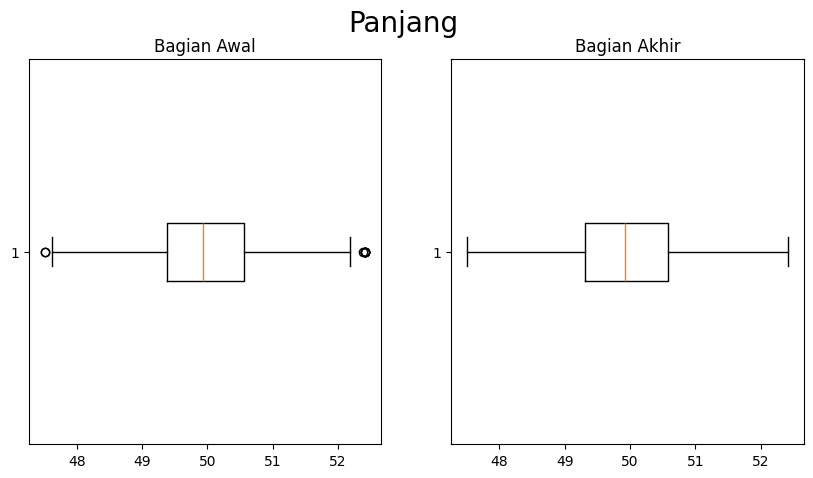

In [2188]:
lower_half_length = databaseNonOutlier['Length'][:1000]
upper_half_length = databaseNonOutlier['Length'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Panjang', fontsize=20)
ax[0].boxplot(lower_half_length, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half_length, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

#### Langkah Testing
1. $H_0$ : $\sigma_1^2 = \sigma_2^2$ 
2. $H_1$ : $\sigma_1^2 \neq \sigma_2^2$
3. $\alpha = 0.05$

In [2189]:
alpha = 0.05
fscorethreshold_length = scipy.stats.f.ppf(1 - alpha / 2, 999, 999)
print(f"Critical region: f < {-fscorethreshold_length} dan f > {fscorethreshold_length}")
lhvar_length = np.std(lower_half_length) ** 2
uhvar_length = np.std(upper_half_length) ** 2
print("Variansi 1:", lhvar_length)
print("Variansi 2:", uhvar_length)

fscore_length_manual = max(lhvar_length, uhvar_length) / min(lhvar_length, uhvar_length)
print("f-score:", fscore_length_manual)
print(f"P(f < {-fscore_length_manual}) + P(f > {fscore_length_manual}): {2 * scipy.stats.f.cdf(fscore_length_manual, 999, 999)}")

Critical region: f < -1.1321198377470543 dan f > 1.1321198377470543
Variansi 1: 0.7808302724187489
Variansi 2: 0.8021211126863296
f-score: 1.0272669247333723
P(f < -1.0272669247333723) + P(f > 1.0272669247333723): 1.3291847279851856


4. Untuk uji proporsi two-tailed dengan aproksimasi normal untuk binomial, critical region ada di $f < 1.132$
5. f score:
$$f = \frac{s_1^2}{s_2^2}   $$
$$f = \frac{0.8021211126863296}{0.7808302724187489}  = 1.0272669247333723 \; (-1.132 < f < 1.132) $$

$$ P = P(f < -1.0272669247333723) + P(f > 1.0272669247333723) = 1.3293398326429757 > 0.05$$

6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, f score berada di luar daerah kritis dan p value lebih besar dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ tidak dapat ditolak. Kesimpulannya, nilai variansi panjang bagian awal dan bagian akhir bernilai sama.

#### d. Proporsi berat pisang yang lebih besar dari 150 pada bagian awal lebih besar dari bagian akhir

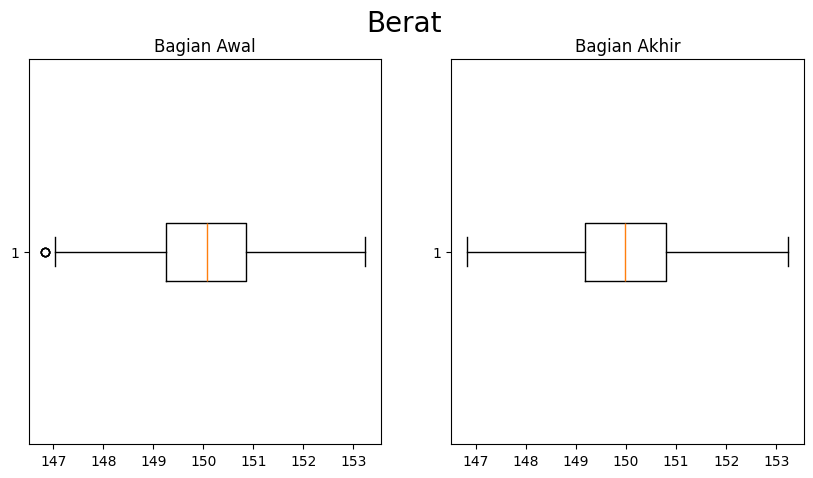

In [2190]:
lower_half_weight = databaseNonOutlier['Weight'][:1000]
upper_half_weight = databaseNonOutlier['Weight'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Berat', fontsize=20)
ax[0].boxplot(lower_half_weight, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half_weight, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

In [2191]:
amount1_weight = (lower_half_weight > 150).sum()
amount2_weight = (upper_half_weight > 150).sum()
n1_weight = 1000
n2_weight = 1000
phat1_weight = amount1_weight / n1_weight
print(f"phat 1 : {phat1_weight}")
phat2_weight = amount2_weight / n2_weight
print(f"phat 2 : {phat2_weight}")
p_weight = (amount1_weight + amount2_weight) / (n1_weight + n2_weight)
print(f"p : {p_weight}")
q_weight = round(1 - p_weight, 4)
print(f"q : {q_weight}")

phat 1 : 0.524
phat 2 : 0.493
p : 0.5085
q : 0.4915


#### Langkah testing
1. $H_0$ : $p_1 = p_2$ 
2. $H_1$ : $p_1 > p_2$
3. $\alpha = 0.05$

In [2192]:
z0_weight = scipy.stats.norm.ppf(0.05) * (-1)
print(f"Critical Region: z > {z0_weight}")
print("Penghitungan menggunakan fungsi library:")
zscore_weight_library, p_weight_library = proportions_ztest(np.array([amount1_weight, amount2_weight]), np.array([n1_weight, n2_weight]), alternative = 'larger')
print(f"z: {zscore_weight_library}")
print(f"P(z < {zscore_weight_library}) : {p_weight_library}")
print("Penghitungan manual:")
zscore_weight_manual = (phat1_weight - phat2_weight) / (np.sqrt(p_weight * q_weight * ((1 / n1_weight) + (1 / n2_weight))))
print(f"z: {zscore_weight_manual}")
print(f"P(z < {zscore_weight_manual}) : {1 - scipy.stats.norm.cdf(zscore_weight_manual)}")

Critical Region: z > 1.6448536269514729
Penghitungan menggunakan fungsi library:
z: 1.3865625188118174
P(z < 1.3865625188118174) : 0.08278760203665986
Penghitungan manual:
z: 1.3865625188118174
P(z < 1.3865625188118174) : 0.0827876020366598


4. Uji proporsi one-tailed. <br>Critical Region ada di $z > 1.645$ 
5. Penghitungan menggunakan fungsi library:
$$z = 1.3865625188118174 \; (z < 1.645) $$
$$ P = P(z < 1.3865625188118174) = 0.9172123979633402 > 0.05$$
Penghitungan manual:
$$z = \frac{\hat{P_1} - \hat{P_2}}{\sqrt{pq(\frac{1}{n_1}+\frac{1}{n_2})}}   $$
$$z = \frac{0.524 - 0.493}{\sqrt{0.5085(0.4915)(\frac{1}{1000}+\frac{1}{1000})}}= 1.3865625188118174 \; (z < 1.645) $$
$$ P = P(z < 1.3865625188118174) = 0.9172123979633402 > 0.05$$
6. Berdasarkan hasil uji tersebut dengan fungsi dari library maupun penghitungan manual, z score berada di luar daerah kritis dan p value lebih besar dari tingkat signifikansi $\alpha$, keduanya menunjukkan $H_0$ tidak dapat ditolak. Kesimpulannya, nilai proporsi berat pisang yang lebih dari 150 pada bagian awal sama dengan bagian akhir.